# Chapter 5 - Exercise 8

In [1]:
using Base.Threads
using MultiThreadingTools
using Plots
pyplot();
nthreads()

1

In [2]:
x_data = collect(0.1:0.05:0.95);
y_data = [ 11.3, 19.9, 24.9, 31.1, 37.2, 36.0,  59.1,  77.2,  96.0,
          90.3, 72.2, 89.9, 91.0, 102,  109.7, 116.0, 126.6, 139.8 ];


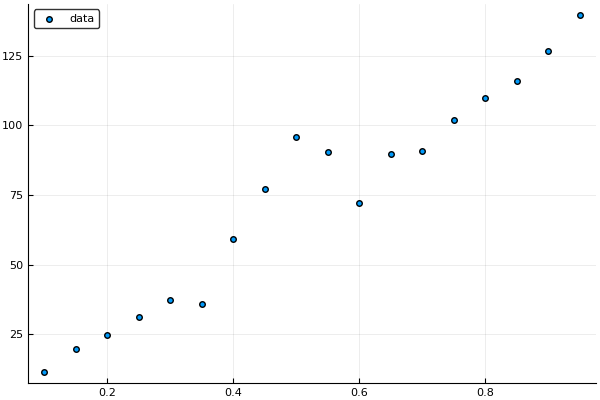

In [3]:
p = scatter(x_data, y_data, label="data")

In [4]:
function model_a(x::Float64, par::Array{Float64})::Float64
    r::Float64 = @. par[1]+par[2]*x+par[3]*x^2;
end

model_a (generic function with 1 method)


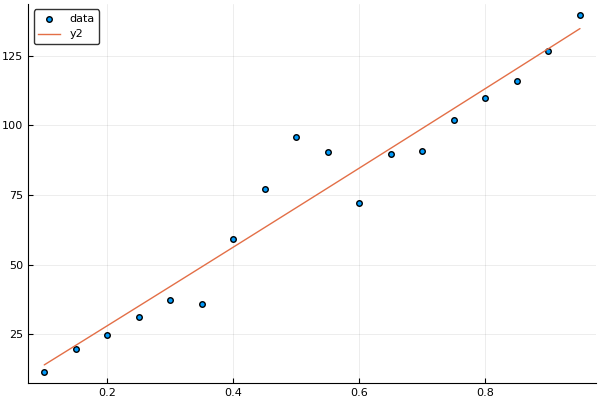

In [5]:
x_model_a = collect(x_data[1]:0.01:x_data[end])
y_model_a = [model_a(x, [0., 140., 2.]) for x in x_model_a]
p = scatter(x_data, y_data, label="data")
plot!(x_model_a, y_model_a)

In [6]:
function normal(x::Float64, par::Array{Float64})::Float64
    r::Float64 = @. 1./(par[2]*sqrt(2*pi))*exp(-0.5*((x-par[1])/par[2])^2);
end

normal (generic function with 1 method)

In [7]:
function likelihood_a(a::Float64, b::Float64, c::Float64)::Float64
    llh::Float64 = 1.
    for i in 1:length(x_data::Array{Float64})
       llh *= normal(y_data[i]::Float64, [model_a(x_data[i], [a,b,c])::Float64 , 4.]) 
    end
    return llh
end;

In [ ]:
function pdf_a(psA::Array{Float64}, psB::Array{Float64}, psC::Array{Float64})::Float64
    n_points_per_ps = length.([psA, psB, psC])
    pdf = zeros(Float64, (n_points_per_ps...))
    @everythread begin
        for ia in 1:length(psA::Array{Float64})
            for ib in  threadpartition(1:length(psB::Array{Float64}))
                for ic in 1:length(psC::Array{Float64})
                    pdf[ia, ib, ic]::Float64 = likelihood_a(psA[ia],psB[ib],psC[ic])::Float64
                end
            end
        end
    end
    r::Float64} = pdf/sum(pdf)
end

In [ ]:
function pdf_a(psA::Array{Float64}, psB::Array{Float64}, psC::Array{Float64})::Float64
    n_points_per_ps = length.([psA, psB, psC])
    pdf = zeros(Float64, (n_points_per_ps...))
    @everythread beginfunction pdf_a(psA::Array{Float64}, psB::Array{Float64}, psC::Array{Float64})::Float64
    n_points_per_ps = length.([psA, psB, psC])
    pdf = zeros(Float64, (n_points_per_ps...))
    @everythread begin
        for ia in 1:length(psA::Array{Float64})
            for ib in  threadpartition(1:length(psB::Array{Float64}))
                for ic in 1:length(psC::Array{Float64})
                    pdf[ia, ib, ic]::Float64 = likelihood_a(psA[ia],psB[ib],psC[ic])::Float64
                end
            end
        end
    end
    r::Float64} = pdf/sum(pdf)
end;
        for ia in 1:length(psA::Array{Float64})
            for ib in  threadpartition(1:length(psB::Array{Float64}))
                for ic in 1:length(psC::Array{Float64})
                    pdf[ia, ib, ic]::Float64 = likelihood_a(psA[ia],psB[ib],psC[ic])::Float64
                end
            end
        end
    end
    r::Float64} = pdf/sum(pdf)
end;

In [ ]:
function pdf_a(psA::Array{Float64}, psB::Array{Float64}, psC::Array{Float64})::Float64
    n_points_per_ps = length.([psA, psB, psC])
    pdf = zeros(Float64, (n_points_per_ps...))
    @everythread begin
        for ia in 1:length(psA::Array{Float64})
            for ib in  threadpartition(1:length(psB::Array{Float64}))
                for ic in 1:length(psC::Array{Float64})
                    pdf[ia, ib, ic]::Float64 = likelihood_a(psA[ia],psB[ib],psC[ic])::Float64
                end
            end
        end
    end
    r::Float64} = pdf/sum(pdf)
end;

In [ ]:
function pdf_a(psA::Array{Float64}, psB::Array{Float64}, psC::Array{Float64})::Float64
    n_points_per_ps = length.([psA, psB, psC])
    pdf = zeros(Float64, (n_points_per_ps...))
    @everythread begin
        for ia in 1:length(psA::Array{Float64})
            for ib in  threadpartition(1:length(psB::Array{Float64}))
                for ic in 1:length(psC::Array{Float64})
                    pdf[ia, ib, ic]::Float64 = likelihood_a(psA[ia],psB[ib],psC[ic])::Float64
                end
            end
        end
    end
    r::Float64} = pdf/sum(pdf)
end;

In [13]:
psA_a = -25:0.5:10
psB_a = 100:0.5:250
psC_a = -100:0.5:40

A = collect(psA_a)
B = collect(psB_a)
C = collect(psC_a)

# probability_distribution_a = pdf_a(A, B, C)

3-element Array{Int64,1}:
  71
 301
 281

In [45]:
function marginalize_B_C_a(pdf)
    n_points_per_ps = size(pdf)
    marg_pdf = zeros(Float64, n_points_per_ps[2:3]...)
    for ib in 1:size(pdf)[2]
        for ic in 1:size(pdf)[3]
            marg_pdf[ib, ic] = sum(pdf[:, ib, ic])
        end
    end                   
    return marg_pdf
end;    
function marginalize_A_C_a(pdf)
    n_points_per_ps = size(pdf)
    marg_pdf = zeros(Float64, n_points_per_ps[1], n_points_per_ps[3])
    for ia in 1:size(pdf)[1]
        for ic in 1:size(pdf)[3]
            marg_pdf[ia, ic] = sum(pdf[ia, :, ic])
        end
    end                   
    return marg_pdf
end;    
function marginalize_A_B_a(pdf)
    n_points_per_ps = size(pdf)
    marg_pdf = zeros(Float64, n_points_per_ps[1:2]...)
    for ia in 1:size(pdf)[1]
        for ib in 1:size(pdf)[2]
            marg_pdf[ia, ib] = sum(pdf[ia, ib, :])
        end
    end                   
    return marg_pdf
end;    

In [46]:
marged_pdf_A_a = marginalize_B_C_a(probability_distribution_a);
marged_pdf_B_a = marginalize_A_C_a(probability_distribution_a);
marged_pdf_C_a = marginalize_A_B_a(probability_distribution_a);


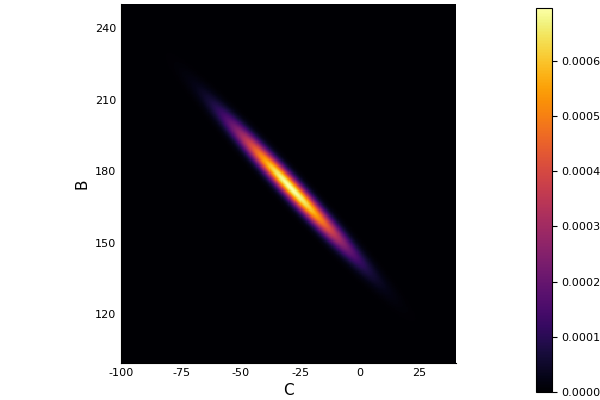

In [47]:
heatmap(psC_a, psB_a, marged_pdf_A_a,aspect_ratio=1)
xlabel!("C")
ylabel!("B")


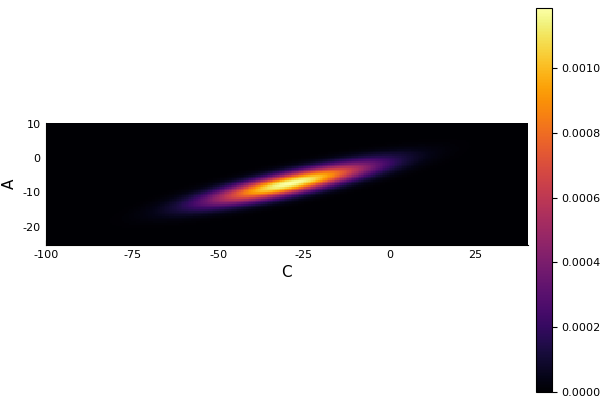

In [48]:
heatmap(psC_a, psA_a, marged_pdf_B_a,aspect_ratio=1)
xlabel!("C")
ylabel!("A")


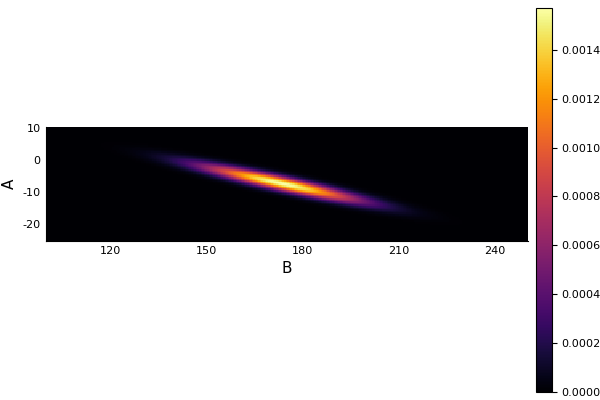

In [49]:
heatmap(psB_a, psA_a, marged_pdf_C_a,aspect_ratio=1)
xlabel!("B")
ylabel!("A")

In [50]:
pdf_plus_coords_a = []
for ia in 1:length(A)
    for ib in 1:length(B)
        for ic in 1:length(C)
            push!(pdf_plus_coords_a, [probability_distribution_a[ia,ib,ic], A[ia], B[ib], C[ic]]) 
        end
    end
end

In [51]:
sort!(pdf_plus_coords_a, by = x -> x[1], rev = true)
mode_a = pdf_plus_coords_a[1][2:4]

3-element Array{Float64,1}:
  -7.0
 172.5
 -28.0


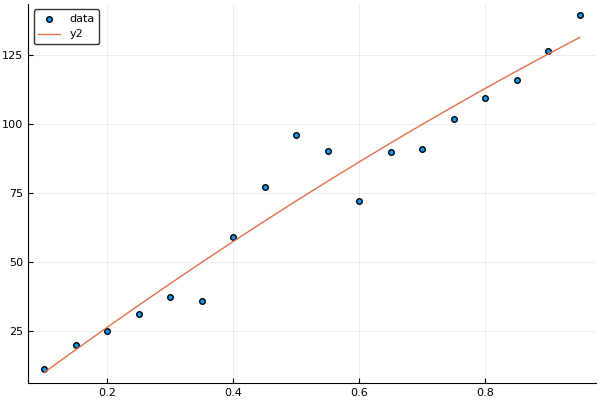

In [52]:
p = scatter(x_data, y_data, label="data")
plot!(x_data, model_a(x_data, mode_a))

In [ ]:
macro marginalize(pdf, n)
    mpdf = zeros(Float64, size(eval(pdf), n))
    lod = [size(eval(pdf), dim) for dim in 1:ndims(eval(pdf))] # length of dimensions
    lofl = vcat(lod[1:n-1],lod[n+1:end])  # lofl: length of for loops
    for i in 1:length(mpdf)
        ind = ""
        for j in 1:ndims(eval(pdf))
            if j == n
                ind *= "$i,"
            else
                ind *= ":,"
            end
        end 
        ind = ind[1:end-1]
        mpdf[i] = eval(parse("sum($pdf[$ind])")) 
    end
    return mpdf
end

# Model B

In [ ]:
function model_b(x::Float64, par::Array{Float64})::Float64
    r::Float64 = @. par[1]+par[2]*x+par[3]*x^2+par[4]/((x-par[5])^2+par[6]^2)
end

p = scatter(x_data, y_data, label="data")
ydata = model_b(collect(x_data[1]:0.01:x_data[end]), [mode_a..., 0.07, 0.5, 0.05])
plot!(collect(x_data[1]:0.01:x_data[end]), ydata)

In [ ]:
function likelihood_b(par::Array{Float64})::Float64
    llh::Float64 = 1.
    for i in 1:length(x_data::Array{Float64})
       llh *= normal(y_data[i]::Float64, [model_b(x_data[i], par) , 4.]::Float64) 
    end
    return llh
end;

In [ ]:
function pdf_b(psA, psB, psC, psD, psE, psF)
    n_points_per_ps = length.([psA, psB, psC, psD, psE, psF])
    pdf = zeros(Float64, (n_points_per_ps...))
    @everythread begin
        for ia in 1:length(psA)
            for ib in threadpartition(1:length(psB))
                for ic in 1:length(psC)
                    for id in 1:length(psD)
                        for ie in 1:length(psE)
                            for i_f in 1:length(psF)
                                pdf[ia,ib,ic,id,ie,i_f]  = likelihood_b([psA[ia],psB[ib],psC[ic],psD[id],psE[ie],psF[i_f]])
                            end
                        end
                    end
                end
            end
        end
    end
    return pdf/sum(pdf)
end;

In [ ]:
psA_b = -15:1:15
psB_b = 100:1:200
psC_b = -5:0.5:5
psD_b = 0:0.02:0.4
psE_b = 0.4:0.02:0.6
psF_b = 0.02:0.005:0.1

A = collect(psA_b)
B = collect(psB_b)
C = collect(psC_b)
D = collect(psD_b)
E = collect(psE_b)
F = collect(psF_b)

probability_distribution_b = pdf_b(A, B, C, D, E, F);

# Marginalizations

In [ ]:
# function marginalize_A(pdf)
#     n_points_per_ps = size(pdf)
#     marg_pdf = zeros(Float64, n_points_per_ps[1])
#     for i in 1:size(marg_pdf)[1]
#         marg_pdf[i] = sum(pdf[i,:,:,:,:,:])    
#     end                   
#     return marg_pdf
# end;    
pdf_A = @marginalize probability_distribution_b 1
# pdf_A = marginalize_A(probability_distribution_b);
plot(collect(psA_b), pdf_A)


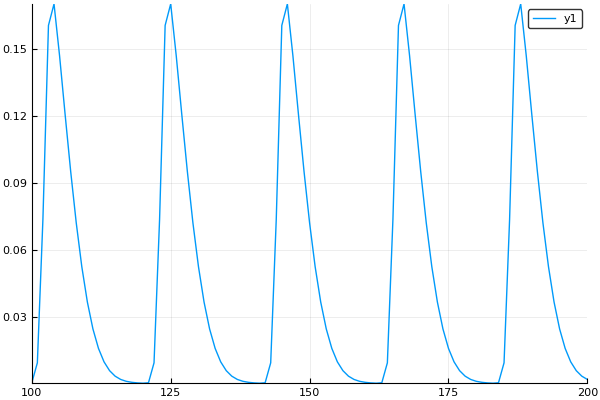

In [97]:
pdf_B = @marginalize probability_distribution_b 2
plot(collect(psB_b), pdf_B)

In [ ]:
pdf_C = @marginalize probability_distribution_b 3
plot(collect(psC_b), pdf_C)

In [ ]:
pdf_D = @marginalize probability_distribution_b 4
plot(collect(psD_b), pdf_D)

In [ ]:
pdf_E = @marginalize probability_distribution_b 5
plot(collect(psE_b), pdf_E)

In [ ]:
pdf_F = @marginalize probability_distribution_b 6
plot(collect(psF_b), pdf_F)

In [ ]:
mode_b = [1,1,1,1,1,1]
for ia in 1:length(A)
    for ib in 1:length(B)
        for ic in 1:length(C)
            for id in 1:length(D)
                for ie in 1:length(E)
                    for i_f in 1:length(F)
                        if probability_distribution_b[ia,ib,ic,id,ie,i_f] > probability_distribution_b[mode_b...]
                            mode_b = ia,ib,ic,id,ie,i_f
                        end
                    end
                end
            end
        end
    end
end

In [ ]:
println(mode_b)

In [ ]:
p = scatter(x_data, y_data, label="data")
plot!(collect(x_data[1]:0.01:x_data[end]), model_b(collect(x_data[1]:0.01:x_data[end]), mode_b))